In [1]:
%matplotlib inline

# Raízes de polinômios: Método de Müller.

## Computação com polinômios

Como exemplo, vamos implementar a forma aninhada de um polinômio de grau 3 (também conhecida como **forma de Hörner**)

In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

sy.init_printing()

# escreve a forma aninhada de um polinomio de grau n

# grau do polinomio
n = 3

# variavel independente
x = sy.Symbol('x');       

# coeficientes do polinomio
a = [ sy.Symbol('a'+ str(i)) \
     for i in range(0,n+1) ] 

# forma aninhada simbolica
p, dp = 0, 0
for j in range(n,-1,-1):
    dp = dp*x + p
    p  = a[j] + p*x
    
# determinacao de derivada de modo simbolico 
dp2 = sy.diff(p,x)

Imprimindo o polinômio simbólico

In [3]:
p

Imprimindo a derivada simbólica do polinômio implementada pelo usuário

In [4]:
dp

Imprimindo a derivada simbólica do polinômio pela função residente `diff`

In [5]:
dp2

Verificando igualdade

In [6]:
dp == dp2

True

## Calculando raízes de polinômios

In [7]:
# define valores dos coeficientes aj para o polinômio
# na ordem a0 + a1x + a2x**2 + ...
v = [-1, 2.2,3.5,4]

# escreve o polinômio
pn = p.subs(dict(zip(a,v)))
print(pn)

x*(x*(4*x + 3.5) + 2.2) - 1


Calcula todas as raízes do polinômio `pn`

In [8]:
rc = sy.roots(pn,x,multiple=True)
rc

Calcula apenas as raízes reais de `pn`

In [9]:
rr = sy.roots(pn,x,multiple=True,filter='R')
rr

## Avaliando polinômios

Podemos avaliar polinômios usando a função `polyval` do _Numpy_. Entretanto, como ela recebe coeficientes do maior para o menor grau, para mantermos a consistência com nosso polinômio anterior, devemos converter a lista `v` para um objeto `array` e fazer uma inversão (`flip`).

In [10]:
vi = np.flip(np.asarray(v),axis=0)
vi

array([ 4. ,  3.5,  2.2, -1. ])

Agora, vamos avaliar o polinômio em $x=\pi$

In [11]:
xi = np.pi
np.polyval(vi,xi)

Note que se avaliássemos o polinômio em um ponto arbitrário, a forma impressa é idêntica àquela que obtivemos anteriormente.

In [12]:
np.polyval(vi,x)

Agora vamos plotar o polinômio. Antes, vamos converter nosso polinômio para uma função a fim de a avaliarmos em um intervalo. Vamos escolher o intervalo $-1 \le x \le 1$

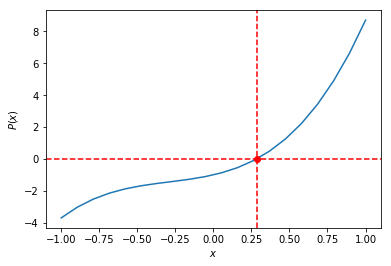

In [13]:
# converte para função
f = sy.lambdify(x,pn)

# intervalo
xf = np.linspace(-1,1,num=20,endpoint=True)

# plotagem do polinômio com destaque para a raiz real
plt.axhline(y=f(rr[0]),c='r',ls='--')
plt.axvline(x=rr[0],c='r',ls='--')
plt.plot(xf,f(xf))
plt.plot(rr[0],f(rr[0]),'ro')
plt.xlabel('$x$')
plt.ylabel('$P(x)$');

## Implementação: Método de Müller

In [14]:
# \TODO caso complexo (verificar aritmética)
def metodo_muller(f,x0,dx,EPS,N):
    """
        Busca aproximação para raiz da função f
        pelo método de Muller.
        
        ENTRADA: 
             f: função; ex. f = lambda x: x^3 + 2*x
            x0: estimativa inicial 
             h: incremento (produz valores vizinhos)
           EPS: erro
             N: iterações
        SAÍDA: 
             x: aproximação de raiz de f
    """
    
    if N < 3:
        raise("N deve ser maior do que 3")
         
    # escolhendo os dois pontos adicionais 
    # na vizinhança de x0 para ter as 3
    # estimativas iniciais
    x1 = x0 - dx
    x2 = x0 + dx
    
    h0 = x1 - x0
    h1 = x2 - x1
    d0 = (f(x1) - f(x0))/h0
    d1 = (f(x2) - f(x1))/h1
    d = (d1 - d0)/(h1 + h0)
    i = 3
    while i <= N:

        b = d1 + h1*d
        
        # discriminante 
        D = (b**2 - 4*f(x2)*d)**0.5        
        
        # Verificando o denominador:
        # Esta condição irá definir o maior denominador
        # haja vista que b + sgn(b)D.
        # (critério de sgn(b))
        if abs(b - D) < abs(b + D):
            E = b + D
        else:
            E = b - D
        
        h = -2*f(x2)/E
        x = x2 + h
        if abs(h) < EPS:
            return x
        
        # atualização
        x0 = x1
        x1 = x2
        x2 = x        
        h0 = x1 - x0
        h1 = x2 - x1
        d0 = (f(x1) - f(x0))/h0
        d1 = (f(x2) - f(x1))/h1
        d = (d1 - d0)/(h1 + h0)
        
        i += 1

## Exemplos

**Exemplo**. Determinando raízes para o polinômio $P(x) = 4x^3 + 3.5x^2 + 2.2x - 1$ com estimativas iniciais $x_0 = 0.5$ $x_1 = 1.0$ e $x_2 = 1.5$, $\epsilon = 10^{-5}$ e $N = 100$. Notemos que o segundo argumento da função desempenha o papel de $x_1$ e o terceiro argumento opera como um "raio" de comprimento $dx = 0.5$ que fará com que $x_0 = x_1 - dx$ e $x_2 = x_1 + dx$. Isto decorre de como o a função foi programada. Veja o código anterior.

In [15]:
f = lambda x: 4*x**3 + 3.5*x**2 + 2.2*x - 1

x0 = metodo_muller(f,1.0,0.5,1e-5,100)


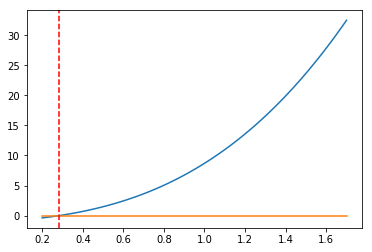

In [21]:
X = np.linspace(0.2,1.7,100)
plt.plot(X,f(X))
plt.plot(X,0*f(X))
plt.axvline(x=x0.real,c='r',ls='--');

**Exemplo**. Determinando raízes para o polinômio $P(x) = x^4 - 3x^3 + x^2 + x + 1$ com estimativas iniciais $x_0 = -0.5$ $x_1 = 0.0$ e $x_2 = 0.5$, $\epsilon = 10^{-5}$ e $N = 100$. 

In [17]:
f2 = lambda x: x**4 - 3*x**3 + x**2 + x + 1

metodo_muller(f2,-0.5,0.5,1e-5,100)

(-0.3390928377617365-0.4466300999972928j)

Com essas estimativas a raiz é um número complexo. Escolhamos agora estimativas diferentes: 

- Caso 1: $x_0 = 0.5$ $x_1 = 1.0$ e $x_2 = 1.5$
- Caso 2: $x_0 = 1.5$ $x_1 = 2.0$ e $x_2 = 2.5$

In [18]:
# caso 1
c1 = metodo_muller(f2,1.5,0.5,1e-5,100)
print(c1)

1.3893906833348133


In [19]:
# caso 2
c2 = metodo_muller(f2,2.0,0.5,1e-5,100)
print(c2)

2.2887949921884836


Por que há resultados diferentes? Vamos verificar o gráfico deste polinômio no domínio $[-1,2.8]$.

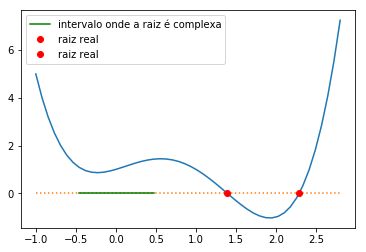

In [22]:
from matplotlib.pyplot import plot,legend
from numpy import linspace, where, logical_and

x = linspace(-1,2.8,50)
plot(x,f2(x))
plot(x,0*f2(x),':')
xi = where( logical_and(x >= -0.5,x <= 0.5) )
xi = x[xi]
plot(xi,0*xi,'-g',label='intervalo onde a raiz é complexa')
plot(c1,0,'or',c2,0,'or',label='raiz real')
legend();


Na primeira escolha de estimativas iniciais, obtivemos uma raiz complexa porque no intervalo $[-0.5,0.5]$, o polinômio não intersecta o eixo $x$. Nos outros dois casos, temos as duas raízes reais do polinômio.